In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import cv2
import tensorflow as tf


In [2]:
def normalize(img):
    img=(img-np.mean(img))/np.std(img)
    return img

In [3]:
base_dir=r'D:\codes\digit\database'
files=os.listdir(base_dir)
x_train=[]
y_train=[]
x_test=[]
y_test=[]
size=30
for i in tqdm(files):
    y=[]
    x=[]
    path=os.path.join(base_dir,i)
    file_name=os.listdir(path)
    for file in file_name:
        one_hot=np.zeros((1,10))
        one_hot[0,int(i)] = 1 
        #for image
        img=cv2.imread(os.path.join(path,file),cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(size,size))
        img=img.reshape(1,-1)
        img=normalize(img)
        x.append(img)
        y.append(one_hot)
    x=np.array(x)
    y=np.array(y)
    x_test.append(x[:100,:,:])
    y_test.append(y[:100,:,:])
    x_train.append(x[100:,:,:])
    y_train.append(y[100:,:,:])

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:35<00:00, 27.52s/it]


In [4]:
x_train=np.array(x_train).reshape(-1,size*size)
y_train=np.array(y_train).reshape(-1,10)
x_test=np.array(x_test).reshape(-1,size*size)
y_test=np.array(y_test).reshape(-1,10)
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(29010, 900)
(29010, 10)
(1000, 900)
(1000, 10)


In [5]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(size*size,activation='relu',input_shape=(size*size,),kernel_regularizer='l2'),
    tf.keras.layers.Dense(160,activation='relu',kernel_regularizer='l2'),
    tf.keras.layers.Dense(80,activation='relu',kernel_regularizer='l2'),
    tf.keras.layers.Dense(40,activation='relu',kernel_regularizer='l2'),
    tf.keras.layers.Dense(10,activation='softmax',kernel_regularizer='l2'), 
])

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 900)               810900    
_________________________________________________________________
dense_1 (Dense)              (None, 160)               144160    
_________________________________________________________________
dense_2 (Dense)              (None, 80)                12880     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                410       
Total params: 971,590
Trainable params: 971,590
Non-trainable params: 0
_________________________________________________________________


In [8]:
it=20
history=model.fit(x_train,y_train,batch_size=128,epochs=it)

Epoch 1/20
227/227 [==============================] - 4s 16ms/step - loss: 3.2752 - accuracy: 0.8488 0s - loss: 3.5719 
Epoch 2/20
227/227 [==============================] - 3s 15ms/step - loss: 1.0895 - accuracy: 0.9192
Epoch 3/20
227/227 [==============================] - 3s 15ms/step - loss: 0.9035 - accuracy: 0.9272
Epoch 4/20
227/227 [==============================] - 3s 15ms/step - loss: 0.8334 - accuracy: 0.9308
Epoch 5/20
227/227 [==============================] - 3s 14ms/step - loss: 0.7916 - accuracy: 0.9344
Epoch 6/20
227/227 [==============================] - 3s 15ms/step - loss: 0.7625 - accuracy: 0.9375
Epoch 7/20
227/227 [==============================] - 3s 15ms/step - loss: 0.7430 - accuracy: 0.9395
Epoch 8/20
227/227 [==============================] - 3s 15ms/step - loss: 0.7216 - accuracy: 0.9422
Epoch 9/20
227/227 [==============================] - 3s 15ms/step - loss: 0.7189 - accuracy: 0.9401
Epoch 10/20
227/227 [==============================] - 3s 15ms/step - lo

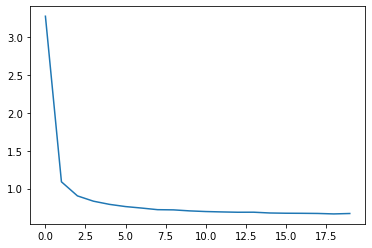

In [9]:
# plt.contour([[i for i in range(20)],history.history['loss']],50, cmap='RdGy')
plt.plot([i for i in range(it)],history.history['loss'])
plt.show()

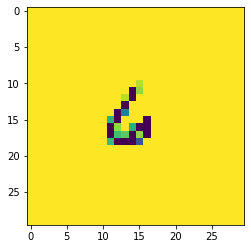

Neural Network Prediction: 6
do you want to continue(y/n)
y


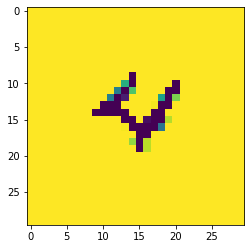

Neural Network Prediction: 4
do you want to continue(y/n)
y


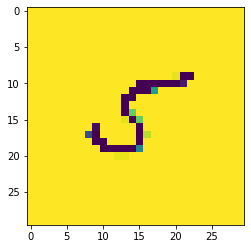

Neural Network Prediction: 5
do you want to continue(y/n)
y


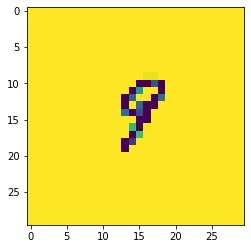

Neural Network Prediction: 9
do you want to continue(y/n)
y


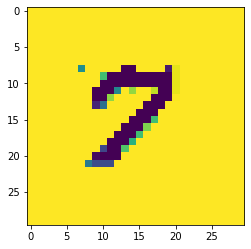

Neural Network Prediction: 7
do you want to continue(y/n)


In [ ]:
for i in range(x_test.shape[0]):
    test=x_test[np.random.randint(0,x_test.shape[0])]
    v=test.reshape(size,size)
    plt.imshow(v)
    plt.show()
    pre=model.predict(test.reshape(1,size*size))
    p=np.argmax(pre)
    print('Neural Network Prediction:',p)
    print("do you want to continue(y/n)")
    c=input()
    if (c=='y'or c=='Y'):
        continue
    else:
        print('exitting!! Done')
        break